In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [63]:
# read embeddings
def read_embeddings(path):
    embeddings_index = {}
    with open(os.path.join(GLOVE_DIR, path)) as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, 'f', sep=' ')
            embeddings_index[word] = coefs
    return embeddings_index

def emb_chunk(embeddings, chosen_words):
    chunk = {}
    for w in chosen_words:
        chunk[w] = embeddings[w]
    return chunk

def rand_chunk(embeddings, size, from_size, to_size, seed):
    np.random.seed(seed)
    chunk = {}
    for i in range(size):
        r = np.random.randint(to_size) + from_size
        word = list(embeddings.keys())[r]
        chunk[word] = embeddings[word]
    return chunk

# function which counts norm of difference between every two vectors in data
def count_dist(data):
    l = len(data)
    d = np.zeros((l,l))
    for i, i_key in enumerate(data.keys()):
        for j, j_key in enumerate(data.keys()):
            d[i,j] = np.linalg.norm(data[i_key] - data[j_key])
    return d

In [64]:
GLOVE_DIR = 'glove.6B'
all_emb = read_embeddings('glove.6B.100d.txt')
words = ['bmw',
         'fiat',
         'opel',
         'mercedes',
         'astra',
         'sheep',
         'rabbit',
         'parrot',
         'cat',
         'dog',
         'cow',
         'cook',
         'footballer',
         'carpenter',
         'bricklayer',
         'barcelona',
         'warsaw',
         'berlin',
         'paris',
         'prague',
         'moscow',
         'athens',
         'rome',
         'germany',
         'poland',
         'spain',
         'france',
         'italy',
         'russia',
         'czech',
         'greece']
emb = emb_chunk(all_emb, words)

In [65]:
groups = ['car brands',
          'animals',
          'professions',
          'cities',
          'countries']
groups_dict = {
    groups[0] : [0, 5],
    groups[1] : [5, 11],
    groups[2] : [11, 15],
    groups[3] : [15, 23],
    groups[4] : [23, 31],
}

In [66]:
labels = []
for key in groups_dict.keys():
    first_idx, last_idx = groups_dict[key]
    for i in range(first_idx, last_idx):
        labels.append(key)

In [67]:
def count_group_dist(groups_dict, dist):
    for key in groups_dict.keys():
        first_idx = groups_dict[key][0]
        last_idx = groups_dict[key][1]
        dist_sum = 0.0
        iter = 0
        for i in range(first_idx, last_idx):
            for j in range(i, last_idx):
                dist_sum += np.linalg.norm(dist[i] - dist[j])
                iter += 1
        x = groups_dict[key][1]-groups_dict[key][0]
        print(key, np.round(dist_sum, 1), 'unit_dist', np.round(dist_sum/(0.5*(x**2)+0.5*x), 2), '\n')

dist = count_dist(emb)
count_group_dist(groups_dict, dist)

car brands 87.6 unit_dist 5.84 

animals 110.8 unit_dist 5.27 

professions 65.6 unit_dist 6.56 

cities 246.8 unit_dist 6.85 

countries 248.1 unit_dist 6.89 



In [68]:
print('silhouette score', np.round(silhouette_score(dist, labels), 3))

silhouette score 0.222


In [69]:
def standarize_features(emb):
    for e in emb:
        for j in range(1):
            e[j] = (e[j] - np.mean(emb[:,j])) / np.std(emb[:,j])
    return emb

In [70]:
pca = PCA(n_components=2)
two_dim_emb = pca.fit_transform(list(emb.values()))
two_dim_emb

array([[ 0.86107938,  4.39244546],
       [ 0.43565883,  4.1959308 ],
       [ 1.04931913,  3.52462138],
       [ 0.54686163,  3.86760315],
       [ 1.59604788,  3.90789337],
       [ 4.19076817, -1.29370797],
       [ 3.8972927 , -1.40775884],
       [ 3.91015378, -1.0982207 ],
       [ 3.80886463, -1.58321269],
       [ 3.9962864 , -1.63961073],
       [ 3.35788339, -2.13368697],
       [ 1.61255426, -1.88513008],
       [ 0.74813974, -0.84545121],
       [ 2.27250044, -0.0337971 ],
       [ 1.95257968,  0.71522815],
       [-1.4606145 ,  0.21522279],
       [-2.1982702 , -0.11143554],
       [-1.96819518, -0.54362653],
       [-1.52984933, -0.52457702],
       [-2.23429933, -0.53481116],
       [-2.4930322 , -1.79366727],
       [-1.85501574, -1.28844673],
       [-1.9985189 , -0.63782682],
       [-2.45689849,  0.31689667],
       [-2.59303469, -0.17384198],
       [-1.84386509,  0.01438322],
       [-1.86988556, -0.32011092],
       [-2.43055287, -0.09031809],
       [-2.7663872 ,

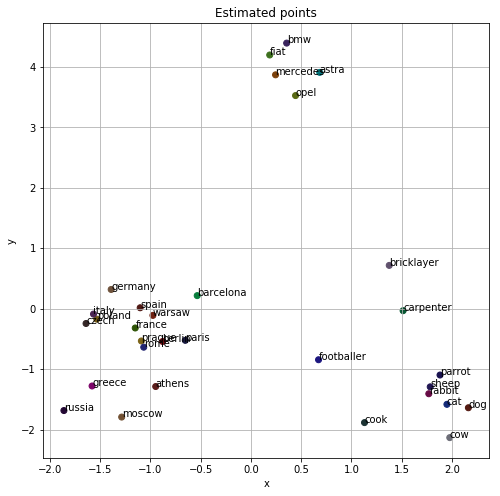

In [71]:
def plot_results(last_x, file_name, labels=None):
    x = last_x[:,0]
    y = last_x[:,1]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    ax.set_title('Estimated points')
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    colors = np.random.rand(len(x), 3) * 0.5
    plt.scatter(x, y, c=colors)
    if labels != None:
        for i in range(len(labels)):
            ax.annotate(labels[i], (x[i], y[i]))
    plt.grid()
    plt.savefig(file_name, bbox_inches='tight', dpi=300)
    plt.show()
    
std_emb = standarize_features(two_dim_emb)
plot_results(std_emb, file_name='graph-6B-100d', labels=words)

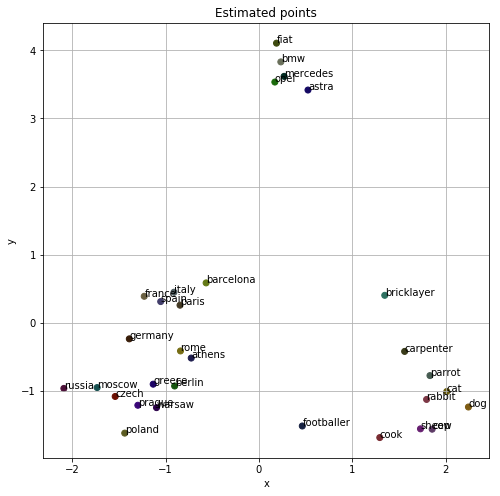

car brands 73.8 unit_dist 4.92 

animals 93.4 unit_dist 4.45 

professions 60.6 unit_dist 6.06 

cities 210.1 unit_dist 5.83 

countries 218.8 unit_dist 6.08 

silhouette score 0.235


In [72]:
GLOVE_DIR = 'glove.6B'
all_emb = read_embeddings('glove.6B.50d.txt')
emb = emb_chunk(all_emb, words)
two_dim_emb = pca.fit_transform(list(emb.values()))
std_emb = standarize_features(two_dim_emb)
plot_results(std_emb, file_name='graph-6B-50d', labels=words)
dist = count_dist(emb)
count_group_dist(groups_dict, dist)
print('silhouette score', np.round(silhouette_score(dist, labels), 3))

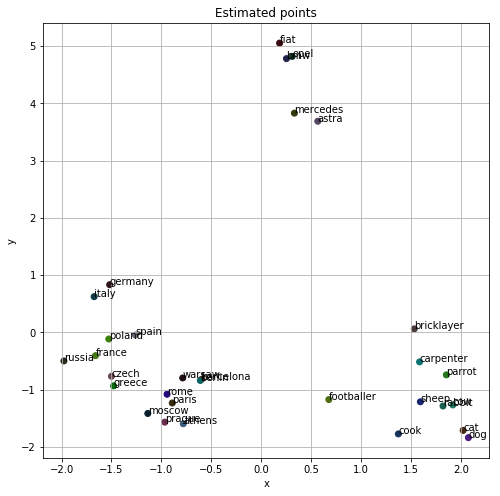

car brands 114.5 unit_dist 7.63 

animals 145.5 unit_dist 6.93 

professions 72.5 unit_dist 7.25 

cities 303.5 unit_dist 8.43 

countries 314.3 unit_dist 8.73 

silhouette score 0.156


In [73]:
GLOVE_DIR = 'glove.6B'
all_emb = read_embeddings('glove.6B.200d.txt')
emb = emb_chunk(all_emb, words)
two_dim_emb = pca.fit_transform(list(emb.values()))
std_emb = standarize_features(two_dim_emb)
plot_results(std_emb, file_name='graph-6B-200d', labels=words)
dist = count_dist(emb)
count_group_dist(groups_dict, dist)
print('silhouette score', np.round(silhouette_score(dist, labels), 3))

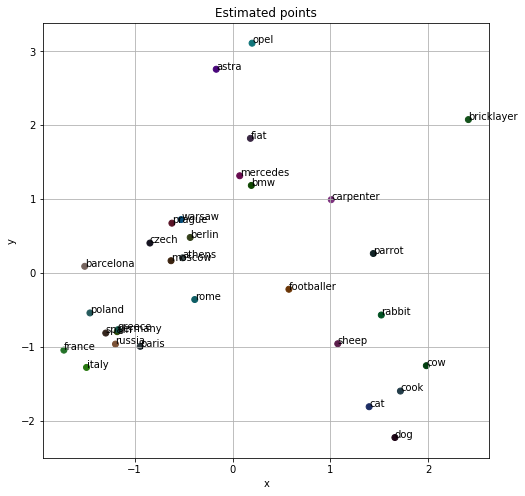

car brands 49.7 unit_dist 3.32 

animals 78.6 unit_dist 3.74 

professions 60.3 unit_dist 6.03 

cities 191.2 unit_dist 5.31 

countries 169.1 unit_dist 4.7 

silhouette score 0.205


In [74]:
GLOVE_DIR = 'glove.twitter.27B'
all_emb = read_embeddings('glove.twitter.27B.25d.txt')
emb = emb_chunk(all_emb, words)
two_dim_emb = pca.fit_transform(list(emb.values()))
std_emb = standarize_features(two_dim_emb)
plot_results(std_emb, file_name='graph-27B-25d', labels=words)
dist = count_dist(emb)
count_group_dist(groups_dict, dist)
print('silhouette score', np.round(silhouette_score(dist, labels), 3))

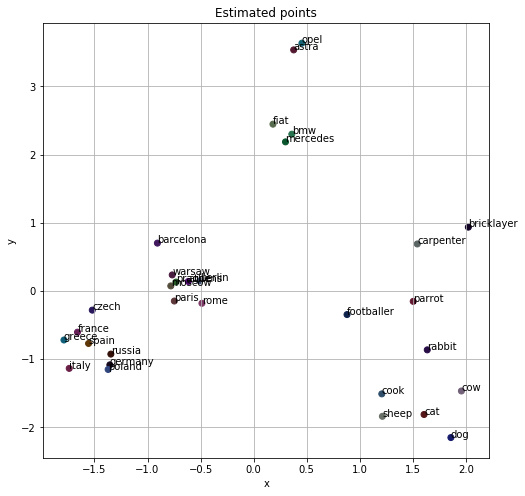

car brands 60.8 unit_dist 4.05 

animals 91.9 unit_dist 4.37 

professions 57.1 unit_dist 5.71 

cities 212.7 unit_dist 5.91 

countries 190.8 unit_dist 5.3 

silhouette score 0.213


In [75]:
GLOVE_DIR = 'glove.twitter.27B'
all_emb = read_embeddings('glove.twitter.27B.50d.txt')
emb = emb_chunk(all_emb, words)
two_dim_emb = pca.fit_transform(list(emb.values()))
std_emb = standarize_features(two_dim_emb)
plot_results(std_emb, file_name='graph-27B-50d', labels=words)
dist = count_dist(emb)
count_group_dist(groups_dict, dist)
print('silhouette score', np.round(silhouette_score(dist, labels), 3))

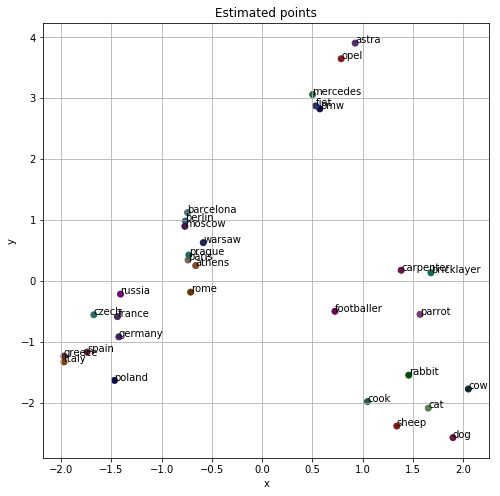

car brands 72.4 unit_dist 4.83 

animals 111.8 unit_dist 5.32 

professions 69.1 unit_dist 6.91 

cities 245.9 unit_dist 6.83 

countries 226.7 unit_dist 6.3 

silhouette score 0.2


In [76]:
GLOVE_DIR = 'glove.twitter.27B'
all_emb = read_embeddings('glove.twitter.27B.100d.txt')
emb = emb_chunk(all_emb, words)
two_dim_emb = pca.fit_transform(list(emb.values()))
std_emb = standarize_features(two_dim_emb)
plot_results(std_emb, file_name='graph-27B-100d', labels=words)
dist = count_dist(emb)
count_group_dist(groups_dict, dist)
print('silhouette score', np.round(silhouette_score(dist, labels), 3))